In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from scipy.spatial.distance import cdist
# from scipy.stats import pearsonr
# import seaborn as sns
from math import ceil
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans

In [5]:
size = 256
n_im = 45
image = np.genfromtxt('ruderman/image_{}.txt'.format(1))

#### Whiten the image

In [58]:
dft_image = np.fft.rfft2(image)
dft_image_norm = dft_image / np.abs(dft_image)
whitened_image = np.fft.irfft2(dft_image_norm)

Text(0.5, 1.0, '"Whitened" image')

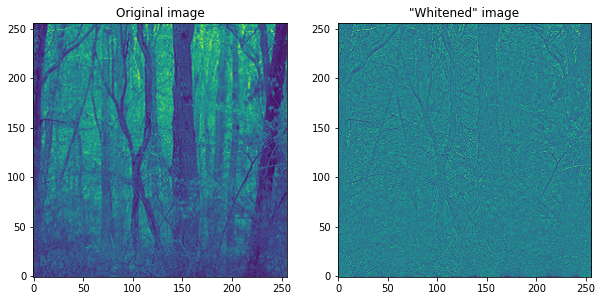

In [59]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, origin = 'lower')
ax[1].imshow(whitened_image, origin = 'lower')
ax[0].set_title('Original image')
ax[1].set_title('"Whitened" image')

Text(0.5, 1.0, 'Correlation function \n of the "whitened" image')

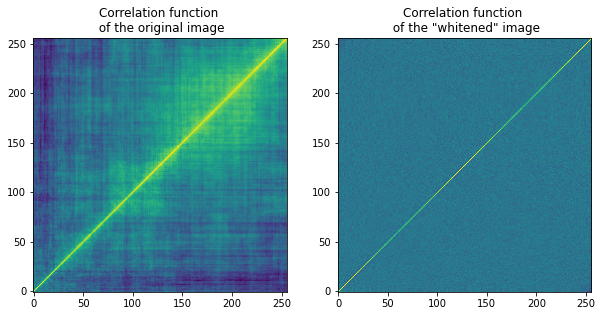

In [136]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(np.corrcoef(image), origin = 'lower')
ax[1].imshow(np.corrcoef(whitened_image), origin = 'lower')
ax[0].set_title('Correlation function \n of the original image')
ax[1].set_title('Correlation function \n of the "whitened" image')

#### Phase-scrambled image

In [80]:
np.random.seed(10)
dft_image = np.fft.rfft2(image)
R = np.exp(2 * np.pi * np.random.rand(dft_image.shape[0],dft_image.shape[1]) * 1j)
dft_image_scr = dft_image*R
phase_scr_image = np.fft.irfft2(dft_image_scr)

Text(0.5, 1.0, '"Phase-scambled" image')

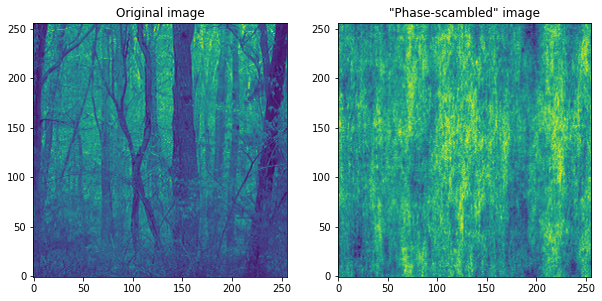

In [137]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, origin = 'lower')
ax[1].imshow(phase_scr_image, origin = 'lower')
ax[0].set_title('Original image')
ax[1].set_title('"Phase-scambled" image')

Text(0.5, 1.0, 'Correlation function \n of the "phase-scambled" image')

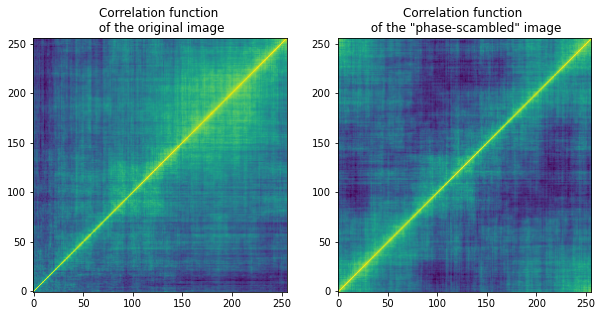

In [138]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(np.corrcoef(image), origin = 'lower')
ax[1].imshow(np.corrcoef(phase_scr_image), origin = 'lower')
ax[0].set_title('Correlation function \n of the original image')
ax[1].set_title('Correlation function \n of the "phase-scambled" image')

In [121]:
np.random.seed(10)
dft_image2 = np.fft.fft2(image)
R2 = np.exp(2 * np.pi * np.random.rand(dft_image2.shape[0],dft_image2.shape[1]) * 1j)
R2_ = np.array([[-R2[-i][-j] for j in range(size)] for i in range(size)])
dft_image_scr2 = dft_image2*R2*R2_[1,2]
phase_scr_image2 = np.fft.ifft2(dft_image_scr2)

Text(0.5, 1.0, '"Phase-scambled" image')

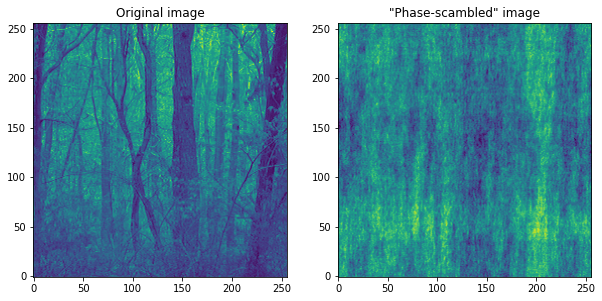

In [139]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, origin = 'lower')
ax[1].imshow(np.abs(phase_scr_image2), origin = 'lower')
ax[0].set_title('Original image')
ax[1].set_title('"Phase-scambled" image')

Text(0.5, 1.0, 'Correlation function \n of the "phase-scambled" image')

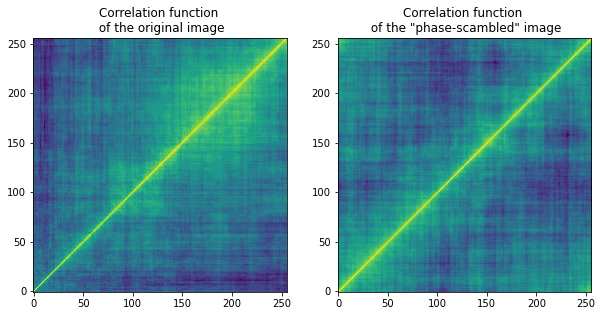

In [140]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(np.corrcoef(image), origin = 'lower')
ax[1].imshow(np.corrcoef(np.abs(phase_scr_image2)), origin = 'lower')
ax[0].set_title('Correlation function \n of the original image')
ax[1].set_title('Correlation function \n of the "phase-scambled" image')